# CBIR using KMeans clustering

In [1]:
from skimage import color, exposure, io
import numpy as np

In [2]:
images = io.imread_collection("../image/*.jpg")

We use histogram (specifically gray histogram) as feature for each image. This
function is provided by `skimage` library and normalizes the features
automatically.

In [3]:
def get_histogram(image, bins_count):
    gray, _ = exposure.histogram(
        color.rgb2gray(image), normalize=True, nbins=bins_count, source_range="dtype"
    )

    return gray


In [4]:
from sklearn import cluster, metrics

## Varying cluster count

We try different values of cluster and attempt to find the value that gives best
result.

In [5]:
histograms = np.array([get_histogram(image, 10) for image in images])

result = []

for i in range(2, 30, 2):
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(histograms)
    result.append(
        [i, metrics.silhouette_score(histograms, kmeans.labels_), kmeans.inertia_]
    )


In [6]:
import pandas

result_pandas = pandas.DataFrame(
    result, columns=["Cluster count", "Silhouette Score", "Inertia"]
)


In [7]:
result_pandas.loc[:, ["Silhouette Score", "Inertia"]]


,Silhouette Score,Inertia
0,0.575087,79.046700
1,0.334894,37.832920
2,0.348018,26.068309
3,0.322002,21.659677
4,0.299583,18.584961
5,0.278502,16.531534
6,0.276799,14.803033
7,0.275285,13.518977
8,0.276476,12.344987
9,0.272992,11.513532


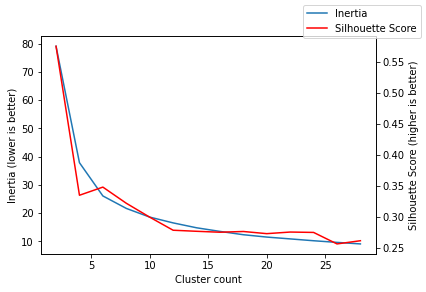

In [8]:
plt1 = result_pandas.plot(
    x="Cluster count", y="Inertia", legend=False, ylabel="Inertia (lower is better)"
)
plt2 = result_pandas.plot(
    x="Cluster count",
    y="Silhouette Score",
    ax=plt1.twinx(),
    color="red",
    legend=False,
    ylabel="Silhouette Score (higher is better)",
)
plt1.figure.legend()

Result: the best result is achieved with cluster count of **2**. But, even with
a cluster count of 5, we get a silhouette score of **0.28**.

# Finding adjusted rand score for KMedoid clustering

In [9]:
kmeans = cluster.KMeans(n_clusters=10)
kmeans.fit(histograms)
prediction = kmeans.predict(histograms)

In [10]:
true_labels = np.array([i for i in range(1000)]) // 100

In [11]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(true_labels, prediction)

0.20835641126659082